## Load Data

In [1]:
# import os
# import sys
from model.mlp import MLP
from model.dataset import Dataset

trainloader, testloader = Dataset().load()


## Train model

In [4]:
model = MLP(neurons=2, layers=1, epochs=2)

model.start_train(trainloader)
model.start_eval(testloader)

Sequential(
  (Lin1): Linear(in_features=784, out_features=2, bias=True)
  (fc): Linear(in_features=2, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
number of layer: 1  number of neurons: 2


  0%|          | 0/2 [00:00<?, ?it/s]

[1,  1000] loss: 2.069073


 50%|█████     | 1/2 [00:06<00:06,  6.71s/it]

[2,  1000] loss: 1.894841


100%|██████████| 2/2 [00:11<00:00,  5.78s/it]


Finished Training
Accuracy of the network on the 10000 test images: 60.830000 %


## Load Trained Model

In [2]:
from model.mlp import LOG_DIR
import os
import torch

log = torch.load("D:\Documents\\1102\AI\ml-practices\lab1\model\log\l1_n2\l1_n2_e2_of_2")
model = MLP(**log)
model.start_eval(testloader)

Sequential(
  (Lin1): Linear(in_features=784, out_features=2, bias=True)
  (fc): Linear(in_features=2, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
number of layer: 1  number of neurons: 2
Accuracy of the network on the 10000 test images: 60.830000 %


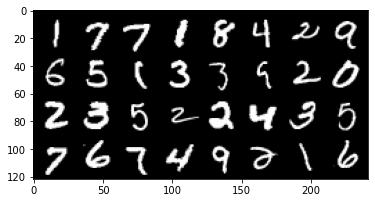

    1     7     7     1     8     4     2     9     6     5     1     3     3     9     2     0     2     3     5     2     2     4     3     5     7     6     7     4     9     2     1     6


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #（channels,imagesize,imagesize）=>（imagesize,imagesize,channels）
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % Dataset.classes[labels[j]] for j in range(32)))

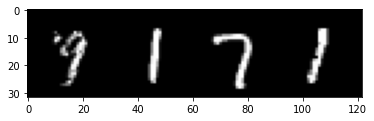

GroundTruth:      9     1     7     1
Predicted:      7     1     7     1


In [5]:
import torch
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % Dataset.classes[labels[j]] for j in range(4)))
outputs = model(images.to("cuda:0"))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % Dataset.classes[predicted[j]]
                              for j in range(4)))